## Rationale: Compare deconvoluted single cell datasets generated with different references (Tabula Sapiens vs Tabula Muris)

To demonstrate whether deconvoluting the human right atrium (RA) with mouse reference data (Tabula Muris) is a robust approach, we compared the single cell deconvoluted results obtained using Tabula Muris with those generated with Tabula Sapiens.

## Load modules

In [87]:
import pandas as pd
import numpy as np
import scanpy
import matplotlib.pyplot as plt
import scipy.stats as pearsonr
import bulk2space
from tqdm import tqdm

## Load the input files

Loading the RA single cell data generated using Tabula Muris and Tabula Sapiens.
The following files will be loaded:
- RA sc data generated from Tabula Muris
- RA sc meta generated from Tabula Muris
- RA sc data generated from Tabula Sapiens
- RA sc meta generated from Tabula Sapiens

In [88]:
# Right atrium data generated from Tabula Muris
ra_ms_data = bulk2space.utils.load_data(
    input_bulk_path="C:/Users/chelu/OneDrive - The University of Manchester/PhD OneDrive/Coding/Python Material/Bulk2space/Datasets/Halina Dobrzynski/Right Atrium/RA_human_bulk_cleaned.csv",
    input_sc_data_path="C:/Users/chelu/OneDrive - The University of Manchester/PhD OneDrive/Coding/Python Material/Bulk2space/Datasets/Halina Dobrzynski/Right Atrium/output/RA_human_from_mouse_sc_data.csv",
    input_sc_meta_path="C:/Users/chelu/OneDrive - The University of Manchester/PhD OneDrive/Coding/Python Material/Bulk2space/Datasets/Halina Dobrzynski/Right Atrium/output/RA_human_from_mouse_sc_celltype.csv",
    input_st_data_path="C:/Users/chelu/OneDrive - The University of Manchester/PhD OneDrive/Coding/Python Material/Bulk2space/Datasets/Halina Dobrzynski/Right Atrium/st_data.csv",
    input_st_meta_path="C:/Users/chelu/OneDrive - The University of Manchester/PhD OneDrive/Coding/Python Material/Bulk2space/Datasets/Halina Dobrzynski/Right Atrium/st_meta.csv",
)

loading data......
load data done!


In [89]:
display(ra_ms_data['input_sc_meta'])

# Create a scanpy object for later use
sc = scanpy.AnnData(ra_ms_data["input_sc_data"].T)
sc.obs = ra_ms_data["input_sc_meta"][["Cell_type"]]

,Cell,Cell_type
0,C_1,coronary vascular endothelial cell
1,C_2,valve cell
2,C_3,fibroblast of cardiac tissue
3,C_4,endothelial cell of endocardium
4,C_5,fibroblast of cardiac tissue
...,...,...
2894,C_2895,atrial cardiomyocyte
2895,C_2896,atrial cardiomyocyte
2896,C_2897,atrial cardiomyocyte
2897,C_2898,atrial cardiomyocyte


In [90]:
# Right atrium data generated from Tabula Sapiens
ra_ts_data = pd.read_csv(
    "output_from_TS/RA_from_TS_sc_data.csv")
ra_ts_meta = pd.read_csv(
    "output_from_TS/RA_from_TS_sc_celltype.csv")

ra_ts_meta.head()

,Unnamed: 0,Cell,Cell_type
0,0,C_1,Cardiac Muscle Cells
1,1,C_2,Cardiac Muscle Cells
2,2,C_3,Endothelial Cells
3,3,C_4,Cardiac Muscle Cells
4,4,C_5,Cardiac Muscle Cells


## Correlation matrix

Calculate 200 marker genes of RA cells generate using Tabula Muris

In [91]:
sc = scanpy.AnnData(ra_ms_data["input_sc_data"].T)
sc.obs = ra_ms_data["input_sc_meta"][["Cell_type"]]
scanpy.tl.rank_genes_groups(sc, "Cell_type", method="wilcoxon")
marker_df = pd.DataFrame(sc.uns["rank_genes_groups"]["names"]).head(200)
marker = list(np.unique(np.ravel(np.array(marker_df))))

# the mean expression of 200 marker genes of input sc data
sc_marker = ra_ms_data["input_sc_data"].loc[marker, :].T
new_index = ra_ms_data['input_sc_meta']['Cell'].to_list() ## Keep commented if 'Cell' key error 
ra_ms_data['input_sc_meta'] = ra_ms_data['input_sc_meta'].set_index('Cell') ## Keep commented if 'Cell' key error 
sc_marker["Cell_type"] = ra_ms_data["input_sc_meta"]["Cell_type"]
sc_marker_mean = sc_marker.groupby("Cell_type")[marker].mean()



In [92]:
display(sc_marker_mean)

,ABCA8,ABCB1,ABCC9,ABHD12,ABHD6,ABI3,ABI3BP,ABLIM1,ABLIM3,ACADM,...,YPEL3,YWHAB,YWHAQ,YWHAZ,ZBTB20,ZFAND5,ZFHX3,ZFP36L2,ZNF106,ZNF622
Cell_type,,,,,,,,,,,,,,,,,,,,,
atrial cardiomyocyte,0.030474,0.024539,0.028661,0.115384,0.005506,0.029049,0.079596,0.151969,0.022493,0.629446,...,0.440014,0.362847,0.279094,0.572129,0.234956,0.312593,0.036221,0.063303,0.380514,0.039710
coronary vascular endothelial cell,0.001489,0.161751,0.000000,0.088134,0.181522,0.427485,0.006027,0.775695,0.445656,0.174340,...,0.600843,1.096931,1.011121,1.395291,0.350173,0.471670,0.071205,0.032647,0.180295,0.167907
endothelial cell of endocardium,0.004572,0.029683,0.022005,0.234729,0.179079,0.349801,0.083400,0.857162,0.022130,0.372820,...,0.531657,1.159300,0.925942,1.247538,0.412733,0.305715,0.056809,0.064929,0.132732,0.095595
fibroblast of cardiac tissue,0.339567,0.000000,0.122408,0.328215,0.110330,0.000000,0.833924,0.381946,0.000000,0.289264,...,1.090447,1.088631,0.975227,1.354736,1.301109,0.423467,0.280544,0.168717,0.349957,0.245153
macrophage,0.003497,0.614818,0.000000,0.406378,0.930856,0.052693,0.016911,0.395915,0.065669,0.308043,...,0.862151,0.593370,0.300632,1.176686,0.083150,0.986885,0.081799,0.127347,0.059714,0.559243
monocyte,0.007576,0.000000,0.002723,1.129199,0.004669,0.186030,0.013158,0.009644,0.000000,0.335471,...,0.634562,0.819093,0.673435,1.082816,0.122342,0.720026,0.379002,0.355176,0.273451,0.246345
smooth muscle cell,0.000000,0.002222,0.679549,0.075119,0.000000,0.000819,0.000000,0.029376,0.003088,0.884605,...,0.955678,1.152182,1.465264,1.754855,0.475557,0.289799,1.151615,0.005210,0.127931,0.132270
valve cell,0.000000,0.000000,2.823836,0.342394,0.000000,0.000000,0.099026,0.009438,0.000000,0.238051,...,1.206091,1.452141,1.316006,1.630800,0.628878,0.214485,0.280303,0.036624,0.203055,0.027706


Calculate 200 marker genes of RA cells generate using Tabula Muris

In [93]:
ra_ts_meta.index = list(ra_ts_meta["Cell"])
ra_ts_data_new = ra_ts_data.T
new_header = ra_ts_data_new.iloc[0]
ra_ts_data_new = ra_ts_data_new[1:]
ra_ts_data_new.columns = new_header
# ---------------------------------------------------------
# Added this line to fix code breaking at groupby
ra_ts_data_new = ra_ts_data_new.astype(float)
# ---------------------------------------------------------

# Extract mutual marker genes
common_markers = list(set(ra_ts_data_new.columns).intersection(set(marker)))
ra_ts_data_new = ra_ts_data_new[common_markers]

ra_ts_data_new["Cell_type"] = ra_ts_meta["Cell_type"]
ra_ts_marker_mean = ra_ts_data_new.groupby(["Cell_type"])[common_markers].mean()

sc_marker_mean = sc_marker_mean[common_markers]

In [94]:
display(ra_ts_marker_mean)

Unnamed: 0,LRRC8A,ANGPTL2,FABP3,PTGR2,EBF1,EGR1,LRRC32,TCN2,TNS1,NEURL2,...,PRDX5,CYBB,MKNK1,RARRES2,PEX16,FGFR1,PAPSS2,PLOD1,PDGFRL,DBNDD2
Cell_type,,,,,,,,,,,,,,,,,,,,,
Cardiac Fibroblast,0.642087,0.0,0.002779,0.409128,2.424644,0.929596,0.137403,0.000636,1.137689,0.145932,...,1.336749,0.0,0.280167,0.642622,0.140606,1.538802,0.146972,0.721047,1.295602,0.0
Cardiac Muscle Cells,0.244964,0.0,4.595781,0.477265,0.000000,0.000000,0.009582,0.000000,0.008865,2.150835,...,2.756900,0.0,0.151037,0.000000,0.309882,0.440219,0.000000,1.042416,0.000000,0.0
Endothelial Cells,1.541499,0.0,0.000000,0.127884,0.523833,0.005849,2.557961,1.065241,1.968689,0.003605,...,1.815320,0.0,0.106353,0.005149,0.369120,1.499487,2.329499,0.731393,0.000000,0.0
Macrophages,0.073864,0.0,0.625936,0.003968,0.000012,0.148904,0.000252,0.735379,0.174928,0.485021,...,1.128564,0.0,1.011558,0.000262,0.530364,0.146176,0.218220,0.339090,0.000000,0.0
Smooth Muscle Cells,0.455208,0.0,0.000000,0.154149,1.966114,0.046159,0.741066,0.027998,2.225939,0.138347,...,0.996334,0.0,0.322661,0.390666,0.188524,0.310384,0.000000,1.758711,0.000064,0.0


Transpose both datasets prior to correlation calculation

In [95]:
sc_marker_mean = sc_marker_mean.T
ra_ts_marker_mean = ra_ts_marker_mean.T

Plot the correlation matrix between RA single cells generated from different references

100%|██████████| 8/8 [00:00<00:00, 1999.55it/s]


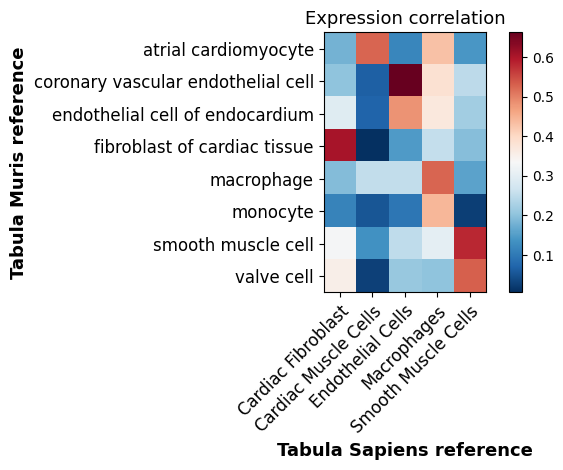

In [96]:
coeffmat = np.zeros(
    (sc_marker_mean.shape[1], ra_ts_marker_mean.shape[1]))
for i in tqdm(range(sc_marker_mean.shape[1])):
    for j in range(ra_ts_marker_mean.shape[1]):

        corrtest = pearsonr.pearsonr(
            sc_marker_mean[sc_marker_mean.columns[i]],
            ra_ts_marker_mean[ra_ts_marker_mean.columns[j]],
        )
        coeffmat[i, j] = corrtest[0]

tm_ct = list(sc_marker_mean.columns)
ts_ct = list(ra_ts_marker_mean.columns)

# plot
fig, ax = plt.subplots()
im = ax.imshow(coeffmat, cmap="RdBu_r")
ax.set_xticks(np.arange(len(ts_ct)))
ax.set_xticklabels(ts_ct, fontsize = 12)
ax.set_yticks(np.arange(len(tm_ct)))
ax.set_yticklabels(tm_ct, fontsize = 12)
plt.xlabel("Tabula Sapiens reference", fontweight = 'bold', fontsize = 13)
plt.ylabel("Tabula Muris reference", fontweight = 'bold', fontsize = 13)
plt.setp(ax.get_xticklabels(), rotation = 45,  ha="right", rotation_mode="anchor")
plt.colorbar(im)
ax.set_title("Expression correlation", fontsize = 13)
fig.tight_layout()

### Polishing the figure

The correlation matrix can be improved by formatting the cell names consistently and order them.

In [97]:
# Reordering  
reordered_cells = ['Cardiac Muscle Cells', 
                   'Endothelial Cells',
                   'Cardiac Fibroblast', 
                   'Macrophages', 
                   'Smooth Muscle Cells']
ra_ts_marker_mean = ra_ts_marker_mean.reindex(columns= reordered_cells)

In [98]:
# Formatting cell names
formatted_names = ['Atrial Cardiomyocyte', 
                   'Coronary Vascular Endothelial Cell',
                   'Endothelial Cell of Endocardium', 
                   'fibroblast of Cardiac Tissue',
                   'Macrophage', 'Monocyte',
                   'Smooth Muscle Cell',
                   'Valve Cell']

sc_marker_mean.columns = formatted_names

Run again the correlation matrix and plot the results

100%|██████████| 8/8 [00:00<00:00, 1599.58it/s]


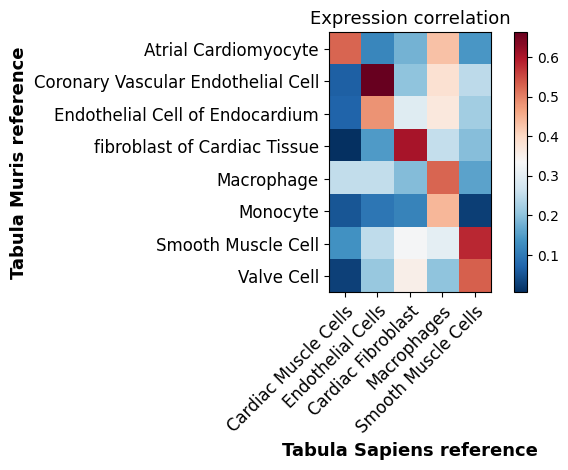

In [99]:
coeffmat = np.zeros(
    (sc_marker_mean.shape[1], ra_ts_marker_mean.shape[1]))
for i in tqdm(range(sc_marker_mean.shape[1])):
    for j in range(ra_ts_marker_mean.shape[1]):

        corrtest = pearsonr.pearsonr(
            sc_marker_mean[sc_marker_mean.columns[i]],
            ra_ts_marker_mean[ra_ts_marker_mean.columns[j]],
        )
        coeffmat[i, j] = corrtest[0]

tm_ct = list(sc_marker_mean.columns)
ts_ct = list(ra_ts_marker_mean.columns)

#plot again
fig, ax = plt.subplots()
im = ax.imshow(coeffmat, cmap="RdBu_r")
ax.set_xticks(np.arange(len(ts_ct)))
ax.set_xticklabels(ts_ct, fontsize = 12)
ax.set_yticks(np.arange(len(tm_ct)))
ax.set_yticklabels(tm_ct, fontsize = 12)
plt.xlabel("Tabula Sapiens reference", fontweight = 'bold', fontsize = 13)
plt.ylabel("Tabula Muris reference", fontweight = 'bold', fontsize = 13)
plt.setp(ax.get_xticklabels(), rotation = 45,  ha="right", rotation_mode="anchor")
plt.colorbar(im)
ax.set_title("Expression correlation", fontsize = 13)
fig.tight_layout()

# Save the final figure
plt.savefig('Tabula Muris vs Tabula Sapiens.png', dpi=600)  # Save the figure as PNG with 600 dpi